### Training "inspecteur modèles" BNP Paribas - Monte-Carlo methods - December 12-17/2019

# TP 3 - Continuous time processes and their approximation schemes

### Exercise 1. Euler scheme

We consider the process $(S_t)_{t \ge 0}$ satisfying the equation

$$
dS_t = r \, S_tdt + \sigma \, S_t dW_t,
\qquad S_0=s_0>0,
\qquad r,\sigma>0,
$$

where $(W_t)_{t \ge 0}$ is a real valued Brownian motion.
Recall that the stochastic differential equation (SDE) above admits an explicit solution:

$$
S_t = s_0 \exp \left( \bigl(r-\frac{\sigma^2}{2} \bigr)t + \sigma W_t \right), \qquad t \ge 0,
$$

called geometric Brownian motion.

The explicit knowledge of the solution allows to

+ _Exactly_ simulate both the solution of the equation and its Euler scheme.

+ Compare their trajectories, and estimate the error of the Euler scheme.

We fix a time horizon $T$ and a number $n$ of discretization steps, yielding the grid

$$ t_k = k \ \frac T n $$.

####  Question 1 (a) (fundamental) :

Write the evolution of the true process 

$$ \bigl( S_{t_k} \bigr)_{0\leq k\leq n} $$

on the time grid $t_k$.

####  Question 1 (b) (fundamental as well) :

Write the evolution of the Euler scheme

$$ \bigl(S^n_{t_k} \bigr)_{0\leq k\leq n} $$

on the same time grid $t_k$.

#### $\blacktriangleright$ Implementation: 

Questions 1 (a) and (b) provide recursive simulation schemes for both the true process $S$ and its Euler scheme, which can be simulated using the same Brownian increments.

In the cells below, implement the simulation schemes given above, and compare their trajectories of $S$ and the Euler scheme $S^n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
T = 1. 
sigma = 0.3
r = 0.02
S_0 = 100

In [ ]:
#########################################
## Discretisation dates t_1, ..., t_n
n = 52
dates = np.linspace(0, T, n+1)

# Time step
Delta_T = T/n

#################################################
# Simulation of the trajectories
# S: the true process
# Se: the Euler scheme
#################################################
# We initialize vectors with n+1 components
S = S_0 * np.ones(n+1)
Se = S_0 * np.ones(n+1)

for i in range(n):
    ## Simulation of a standard Gaussian distribution N(0,1)
    G = np.random.randn()
    
    ##############################################################
    ## TO DO: generate the Brownien increment on [t_i, t_{i+1}]
    ## using the random variable G
    ##############################################################
    accr_brownien = np.sqrt(Delta_T) * G
    
    ############################################################
    ## TO DO: complete the simulation
    # + of the trajectory of the process S
    # + of the trajectory of the Euler scheme Se
    ############################################################
    
    ############################################################
    # Process S
    S[i+1] = S[i]*np.exp( (r-sigma*sigma/2)*Delta_T + sigma*accr_brownien )
    
    ############################################################
    # Euler scheme
    Se[i+1] = Se[i] * (1 + r*Delta_T + sigma*accr_brownien)

###########################
## Plot the trajectories
###########################
import matplotlib.pyplot as plt

###########################################################
plt.plot(dates, S, color="b", label="Process S")
plt.plot(dates, Se, color="r", label=r"Euler scheme $S^n$",
         marker = ".", linewidth=0.,)
###########################################################

plt.xlabel("discretization dates t_i", fontsize=12)

plt.legend(loc="best", fontsize=12)

######################################
# Comparison of final values: 
# remove the if 0
if 1:
    print("Final value S_T of the true process: %1.2f" %S[-1])
    print("Final value S^n_T of the Euler scheme: %1.2f" %Se[-1])

#### Question 2:

Our goal is now to observe the error at final time $T$:

$$
error(n) = \mathbb{E} \Bigl[ \bigl|S_T - S^n_T \bigr| \Bigr]
$$

called the _strong_ error of the Euler scheme.

We can estimate $error(n)$ with a standard Monte-Carlo: replace the expectation with the empirical mean over a large number $N$ of simulated trajectories

$$
\frac 1 N \sum_{i=1}^N \bigl|S^i_T - S^{n,i}_T \bigr|
$$

of the process and the Euler scheme.

In [ ]:
def errorEuler(T, sigma, r, S_0, n, N):
    """
    Euler scheme with n steps for geometric Brownian motion.
    
    This function: estimation of the strong error E[|S_T - S^n_T|]
    from a sample of N iid simulations of the Euler scheme.
    
    Output of the function: the couple (strong error, 95% confidence interval)
    """
    S = S_0*np.ones(N)
    Se = S_0*np.ones(N)
    strong_error = np.zeros(N)
    
    Delta_T = T / n
    
    ####################################################    
    # We can now recursively compute the evolution of the
    # whole iid sample of N simultaneously: 
    # recall S and Se are vectors of size N
    
    for k in range(n):
        g = np.random.normal(loc=0, scale=1, size=N)
        #######################################################
        # To do: implement the evolution of the Euler scheme Se
        # and the process S
        #
        # REMARK: we do not need to stock the whole trajectories.
        # We just require the terminal values S_T and S^n_T
        # in order to evaluate the final error
        #######################################################
        brownian_increment = np.sqrt(Delta_T) * g
        
        S = S * np.exp( (r-sigma*sigma/2)*Delta_T + sigma*brownian_increment )
    
        Se = Se * (1 + r*Delta_T + sigma*brownian_increment)
    
    #######################################################
    # The loop for ends here.
    # Now: evaluate the empirical approximation of the error 
    #######################################################
    sample = np.abs(S - Se) 
    
    strong_error = np.mean( sample )
        
    #############################################
    # To Do: evaluate the 95% confidence interval
    ############################################
    empirical_variance = np.mean(sample**2) - strong_error**2
    
    # ANOTHER POSSIBILITY
    empirical_variance = np.var(sample)
 
    radius_conf_int = 1.96 * np.sqrt(empirical_variance / N)
    
    return strong_error,  radius_conf_int

The cell below

+ Estimates the strong error for different values of $n$ (number of time steps): $n = 1, 2, 4, ..., 2^A$ (here for $A = 6$).


+ Plots the graph of the strong error +/- the confidence interval, as a function of the time step $\frac T  n$.

In [ ]:
N = int(1.e4) # size of the iid sample

n = 1 # initial number of time steps for the Euler scheme

## The number of time steps will evolve as n = 1, 2, 4, ..., 2^A
A = 6

number_steps = np.zeros(A)

strong_errors = np.zeros(A) 
radii_conf_intervals = np.zeros(A) 

for i in range(A):
    number_steps[i] = n
    
    #############################################
    # UPDATE here
    #############################################
    strong_errors[i], radii_conf_intervals[i] = errorEuler(T, sigma, r, S_0, n, N)

    n = 2*n # multiplication of the number of time steps by 2

#############################################
# Plot the error +/- the confidence interval
# as functions of the time step T / n
#############################################


plt.plot(T/ number_steps, strong_errors, color="r", label="Strong error")
plt.plot( T/ number_steps , strong_errors - radii_conf_intervals, color="b", label="95% conf interval")
plt.plot( T/ number_steps , strong_errors + radii_conf_intervals, color="b")

plt.xlabel('Discretisation step')
plt.legend(loc="best", fontsize = 12)
plt.show()


print("Number of steps n:"); print(number_steps)
print("Errors of the Euler scheme with step n:"); print(strong_errors)
print("95% conf interval:"); print (radii_conf_intervals)

### Exercice 2. Multi-level Monte-Carlo method

We now consider the application of the Multi-level Monte-Carlo method to the evaluation of

$$\mathbb{E}[f(S_T)]$$

where $f(s)=(K-s)^+$ and $K$ is fixed. $S$ is the process considered in the previous exercise.

Reminders: the Multi-level method is based on a combination of Euler schemes with decreasing step

$$h_l = \frac T {n_l} = \frac T{2^l}.$$

The corresponding time grids are given by $t_k^l = k \,h_l = k \frac T{2^l}$, for $k = 0, \dots, 2^l$.

Precisely, the multi-level estimator of $\mathbb{E}[f(S_T)]$ is given by

$$
\widehat{f(S_T)}_{\mathrm{ML}}
= \frac1{M_0} \sum_{m=1}^{M_0} (K - S_T^{h_0,0,m})^+
+ \sum_{l=1}^L \frac1{M_l} \sum_{m=1}^{M_l}
\left( (K - S_T^{h_l,l,m})^+ - (K - S_T^{h_{l-1},l,m})^+ \right)
$$ 

where
- for each $h$ and $l$, the $(S^{h,l,m})_{1 \le m \le M_l}$ are iid samples of the Euler scheme with step $h$;


- all the simulations are independent between different levels $l$;


- the schemes $S^{h_l,l,m}$ and $S^{h_{l-1},l,m}$ are constructed from the same Brownian increments.


We recall that, using the the properties of the Euler scheme (weak error of order $=1$, strong error of order $=1/2$), one can show the following upper bound for the quadratic error of the multi-level estimator:

$$
\mathbb{E} \Bigl[
\bigl(
\widehat{f(S_T)}_{\mathrm{ML}} - \mathbb{E}[(K - S_T)^+]
\bigr)^2 \Bigr]
\le
C \biggl( h_L^2 + \sum_{l=0}^L \frac{h_l}{M_l} \biggr)
\qquad \forall M_0, \dots, M_L,
$$

where $C$ is a constant independent from $L$ and the $M_l$.		

1. Find the smallest $L$ so to have 

$$h_L^2 \le \varepsilon^2$$

where $\varepsilon$ is a fixed desired precision.

The solution $(M_0, \dots, M_L)$ of the optimization problem

$$
\min_{M_0, \dots, M_L} \sum_{l=0}^L \frac{M_l}{h_l} \qquad \mbox{ such that } \qquad
\sum_{l=0}^L \frac{h_l}{M_l} = \varepsilon^2
$$

yields

$$
M_0 \sim_c \frac{|\log \varepsilon|}{\varepsilon^2},
\qquad
M_l = M_0 \, 2^{-l}.
$$

What is the interest of the solution of this problem, for the application of the Multi-level method?

2. The code in the cells below generates $P$ iid samples of the multi-level estimator

Complete the code:

+ implement the evolution between the times $t^{l-1}_k = T \frac{k}{2^{l-1}}$ and $t^{l-1}_{k+1} = T \frac{k+1}{2^{l-1}}$ 

+ of a matrix *Se\_fin* (resp. *Se\_gr*) of size $M_l\times P$, containing the Euler scheme of finer discretization step $\frac T{2^{l}}$ (resp. of coarser discretization step $\frac T{2^{l-1}}$)

+ using the same Brownian increments.


+ Finally, add to the variable *estim\_multi* the sum

$$\sum_{m = 1}^{M_l} \bigl( (K - S_T^{h_l,l,m})^+ - (K - S_T^{h_{l-1},l,m})^+ \bigr)$$

divided by $M_l$.

In [2]:
T = 1.
sig = 0.2
r = 0.05
S0 = 100.
K = 110

In [6]:
def estimMultiniveaux(eps, P):
    """
    This function: 
    
    outputs an iid sample of P simulations of the Multi-level estimator
    
    having a desired target precision of order eps
    """    
    h_0 = T # initial value of the discretization step: just one step at level l=0 !
    
    ####################################################
    # To do: fix the total number L of levels 
    # and the number of samples M_0 wished at level 0
    ####################################################
    
    # Number of levels
    L = int( np.log( T/eps ) / np.log(2) )
    
    # Sample size at level l=0
    M_0 = int( np.abs(np.log(eps)) / eps**2 )
    
    # We start with the simulation at level l=0
    g = np.random.randn(M_0, P)
    
    Se_coarse = S0*(1. + r*h_0 + sig * np.sqrt(h_0)*g)

    estim_multi = np.mean((K-Se_coarse)*(K>Se_coarse), axis=0)
    
    ##########################################
    # This is the loop on the different levels 
    for l in range(1, L+1):
        M_l = int(M_0/2.**l)
        
        #############################################
        # Parameters of Euler scheme with finer step
        #############################################
        h_fine = h_0/2.**l
        
        Se_fine = S0*np.ones((M_l, P)) # Euler scheme: fine step h_l
        Se_coarse = S0*np.ones((M_l, P)) # Euler scheme: coarse step h_{l-1} 
        
        ######################################################
        # This is the loop over the coarse discretization grid t_k 
        # 
        # Two Euler schemes evolve: the fine and the coarse 
        #
        # Here, they are both arrays of size M_l x P
        #
        for k in range(2**(l-1)):
            
            g1 = np.random.randn(M_l, P)
            g2 = np.random.randn(M_l, P)
            ####################################################
            # Implement the evolution of the two Euler schemes
            ###################################################
            brown_increment_1 = g1 * np.sqrt( h_fine )
            brown_increment_2 = g2 * np.sqrt( h_fine )
            
            # Two steps for the finer Euler scheme
            Se_fine = Se_fine * (1 + r*h_fine + sig*brown_increment_1)
            
            Se_fine = Se_fine * (1 + r*h_fine + sig*brown_increment_2)
            
            # Only one step for the coarse Euler scheme
            brown_increment = brown_increment_1 + brown_increment_2
            
            Se_coarse = Se_coarse * (1 + r*2*h_fine + sig*brown_increment)
            
        ###################################################################
        # Add to the variable estim_multi the contribution at level l
        # 
        # (See formulas above: we want the mean over the columns
        # of the M_l x P arrays)
        ###################################################################
        term1 = np.mean((K - Se_fine)*(K > Se_fine), axis=0)
        term2 = np.mean((K - Se_coarse)*(K > Se_coarse), axis=0)
        
        estim_multi = estim_multi + term1 - term2
        
    return estim_multi

3. The code in the cell below represents the histogram of $P=1000$ simulations of the Multi-level estimator with a fixed desired precision threshold $\varepsilon$ divided by $2$ from an histogram to the other.

The variable *RMSE* contains the empirical estimation of the root mean square error as a function of $\varepsilon$, where
the true value of the expectation $\mathbb{E}[(K - S_T)^+]$ is (in this special case!) computed exactly using the Black-Scholes formula

$$
\mathbb{E}[(K-S_T)^+] = K \, {\cal N}(-d+\sigma\sqrt{T}) - s_0e^{rT} {\cal N}(-d)
\ \mbox{ where } \ d = \frac{\ln(s_0/K)+ (r+\frac{\sigma^2}2) T}{\sigma\sqrt{T}}
$$

and with ${\cal N}(x)=\int_{-\infty}^xe^{-\frac{y^2}{2}}\frac{dy}{\sqrt{2\pi}}$.


Does the error evolve as expected in terms of $\varepsilon$ ?

Root mean square error (eps=0.20) : 2.13
Root mean square error (eps=0.10) : 0.92
Root mean square error (eps=0.05) : 0.41


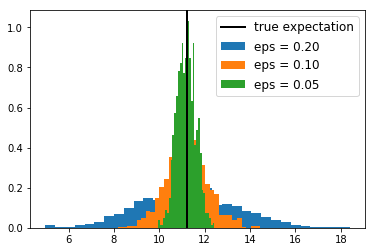

In [7]:
eps = 0.2 # target precision
P = 1000 # wished number of samples of the Multi-level estimator

import scipy.stats as sps

###################################################
# Black Scholes explicit formula for E[(K-S_T)^+]
###################################################
d = (np.log(S0/K) + r*T) / (sig*np.sqrt(T)) + sig*np.sqrt(T)/2.
d2 = d - sig*np.sqrt(T)
expectation = K * sps.norm.cdf(-d2) - S0*np.exp(r*T) * sps.norm.cdf(-d)

plt.clf()

for i in range(3):
    estim_multi = estimMultiniveaux(eps, P)
    
    plt.hist(estim_multi, density="True", bins=int(np.sqrt(P)), label='eps = %1.2f' %(eps))
    
    #########################################################
    # To do: estimation of the RMSE from the sample estim_multi
    RMSE = np.sqrt( np.mean( (estim_multi - expectation)**2 ) )
    #########################################################
    print("Root mean square error (eps=%1.2f) : %1.2f" %(eps, RMSE))
    
    eps = eps/2

plt.axvline(expectation, linewidth=2.0, color='k',label="true expectation")
plt.legend(loc="best", fontsize=12)